In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 200)

In [2]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

In [3]:
train_test_data = pd.concat([train_data, test_data])

In [4]:
object_columns = train_test_data.dtypes[train_test_data.dtypes == 'object'].index.tolist()
object_columns

['workclass',
 'education',
 'marital.status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native.country']

In [5]:
def feature_processed(train_test_data):
    train_test_data['age_education_num_ratio'] = train_test_data['education.num']/train_test_data['age']
    train_test_data['age_fnlwgt_ratio'] = train_test_data['age']/train_test_data['fnlwgt']
    train_test_data['capital_gain_loss_ratio'] = train_test_data['capital.gain']/train_test_data['capital.loss']

In [6]:
feature_processed(train_test_data)

In [7]:
for column in object_columns:
    train_test_data[column] = pd.factorize(train_test_data[column])[0]

In [8]:
train_data = train_test_data[~train_test_data['target'].isnull()]
test_data = train_test_data[train_test_data['target'].isnull()]
test_data = test_data.drop('target', axis=1)

In [9]:
from sklearn.model_selection import train_test_split

ftr_train = train_data.drop(['id', 'target'], axis=1)
target_train = train_data['target']

train_x, valid_x, train_y, valid_y = train_test_split(ftr_train, target_train, test_size=0.3, random_state=2022)

In [10]:
from lightgbm import LGBMClassifier

clf = LGBMClassifier(
    n_estimators=50
)

clf.fit(train_x, train_y, eval_set=[(train_x, train_y), (valid_x, valid_y)], eval_metric='auc')

[1]	training's auc: 0.902099	training's binary_logloss: 0.501221	valid_1's auc: 0.897667	valid_1's binary_logloss: 0.50256
[2]	training's auc: 0.904823	training's binary_logloss: 0.469065	valid_1's auc: 0.900053	valid_1's binary_logloss: 0.472088
[3]	training's auc: 0.909669	training's binary_logloss: 0.443516	valid_1's auc: 0.903522	valid_1's binary_logloss: 0.448186
[4]	training's auc: 0.912046	training's binary_logloss: 0.422055	valid_1's auc: 0.905602	valid_1's binary_logloss: 0.428132
[5]	training's auc: 0.913202	training's binary_logloss: 0.404135	valid_1's auc: 0.906254	valid_1's binary_logloss: 0.411223
[6]	training's auc: 0.916075	training's binary_logloss: 0.389391	valid_1's auc: 0.907777	valid_1's binary_logloss: 0.397243
[7]	training's auc: 0.917456	training's binary_logloss: 0.376696	valid_1's auc: 0.909312	valid_1's binary_logloss: 0.384909
[8]	training's auc: 0.918358	training's binary_logloss: 0.365359	valid_1's auc: 0.910346	valid_1's binary_logloss: 0.374063
[9]	train

LGBMClassifier(n_estimators=50)

<AxesSubplot:title={'center':'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

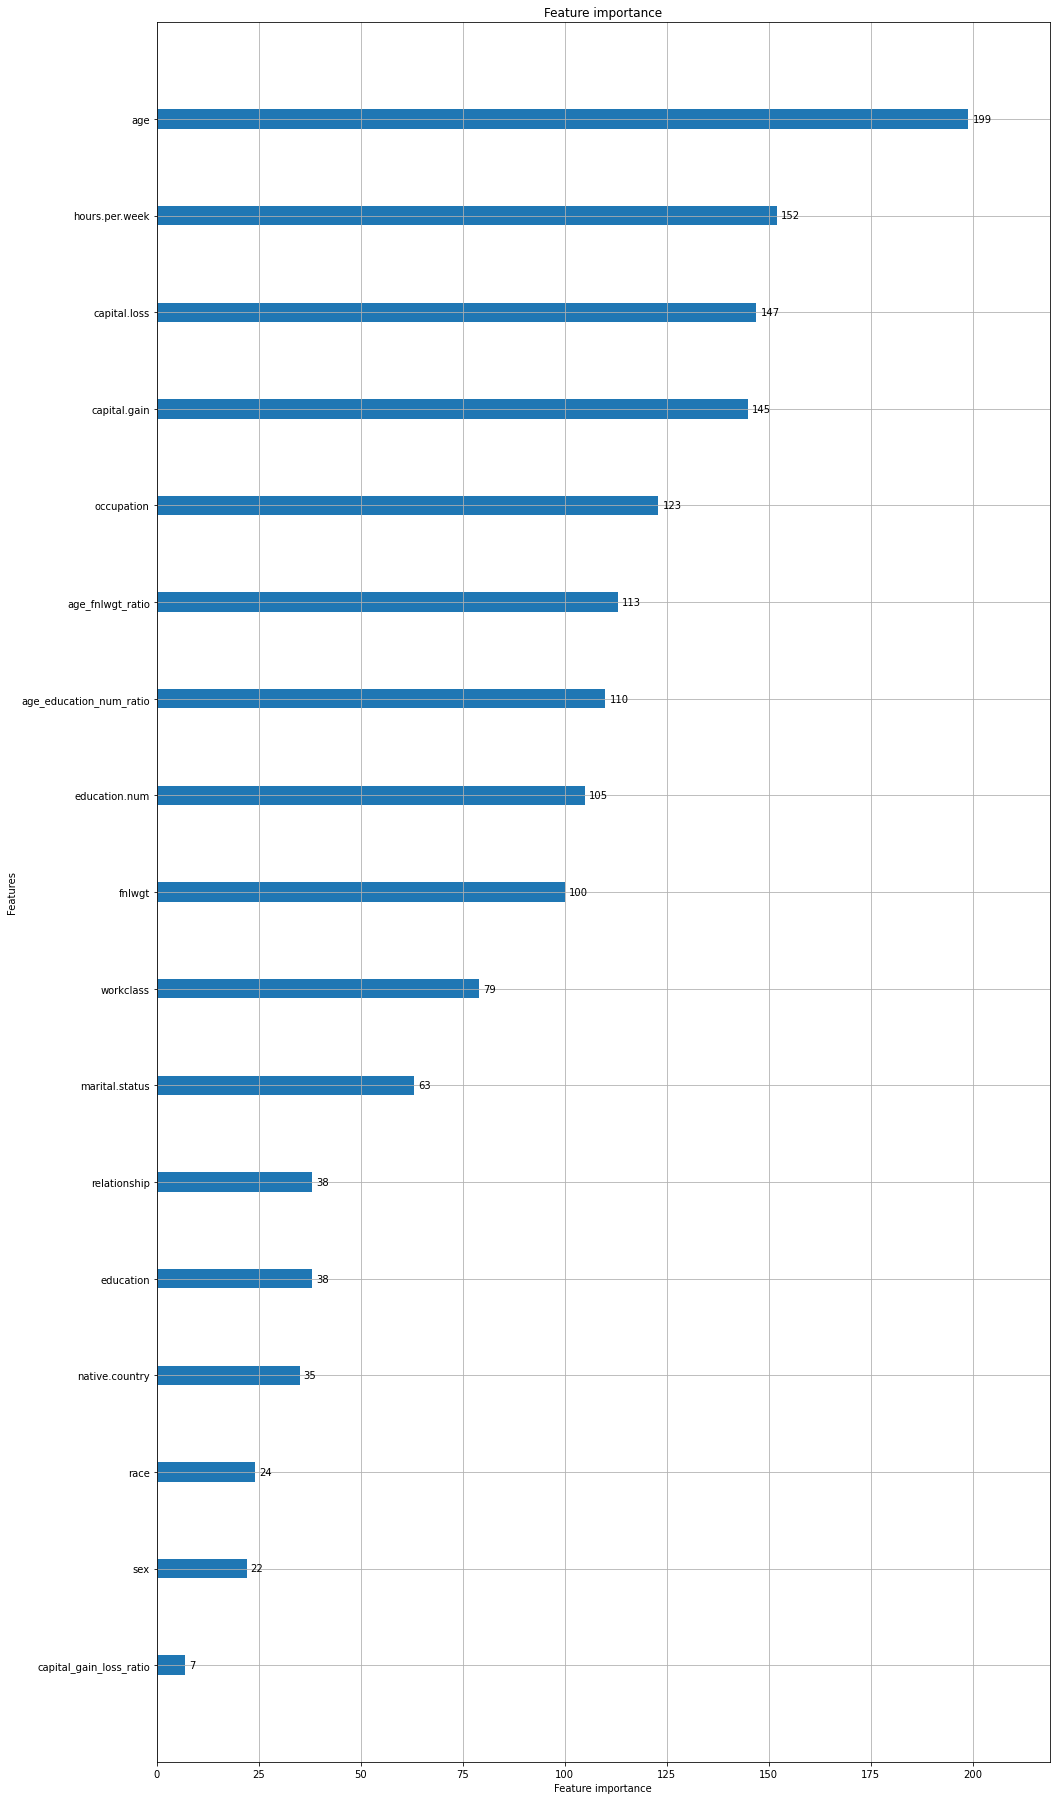

In [11]:
from lightgbm import plot_importance

plot_importance(clf, figsize=(16, 32))

In [12]:
preds = clf.predict_proba(test_data.drop(['id'], axis=1))[:, 1]
for i in range(len(preds)):
    if preds[i] > 0.5:
        preds[i] = 1
    else:
        preds[i] = 0

test_data['target'] = preds

In [13]:
test_data[['id', 'target']].to_csv('feature_engineering.csv', index=False)